In [5]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_{1}& = & \begin{cases}
w h_1 & 
\text{if }l_1 = 1  \\
b & \text{if }l_1 = 0 
\end{cases} \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [6]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [7]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

We import the needed packages and provided the initial parameter values of the model and the levels of human capital, we define our basic model fuctions,

In [8]:
# Importing additional Python packages
from scipy import interpolate
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [9]:
# Defining basic functions taking inspiration from Problem set 7 

def c(h,l,w,b): # Consumption function based on work or not work
    if l == 1:
        return  w*h*l # Consumption wehen woking
    elif l == 0:
        return  b # Consumption being equal to the unemployment benefits

def utility(h,l,rho,gamma,w,b): # Utility from consumption and disutility from working
    return c(h,l,w,b)**(1-rho)/(1-rho) - gamma*l

def v2(h2,l2,rho,gamma,w,b): # Function to maximize in period 2 
    return utility(h2,l2,rho,gamma,w,b)

def v1(h1,l1,v2_interp,rho,gamma,w,b): # Function to maximize in period 1 given expectations of period 2
    
    # a. v2 value, if low skill accumulation
    h2_low = h1 + l1 
    v2_low = v2_interp([h2_low])[0]
    
    # b. v2 value, if high skill accumulation
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total value
    return utility(h1,l1,rho,gamma,w,b) + beta*v2 

We define our solution functions,

In [10]:
# 1. Defining solution function
def solve_period_2(h_vec,rho,gamma,w,b):
    
    # a. Creating grids
    v2_vec =  np.empty(100)
    l2_vec = np.empty(100)
    v2_vec_unemp = np.empty(100)

    # b. loop for each element in capital vector
    for i, h2 in enumerate(h_vec):
    
        # i. utility comparison, selecting labour value and writing to list
        if (v2(h2,1,rho,gamma,w,b) > v2(h2,0,rho,gamma,w,b)) == True: 
            l2_vec[i] = 1
        else: # utility when not working
            l2_vec[i] = 0
            
        # ii. feeding into list
        v2_vec[i] = v2(h2,l2_vec[i],rho,gamma,w,b)
        v2_vec_unemp[i] = utility(h2,0,rho,gamma,w,b)
    
    return v2_vec, l2_vec, v2_vec_unemp

# 2. Solving for utility and labour
v2_vec,l2_vec,v2_vec_unemp =  solve_period_2(h_vec,rho,gamma,w,b)

Plotting the function of the workers utility given their human capital accumulation gives the following graph.

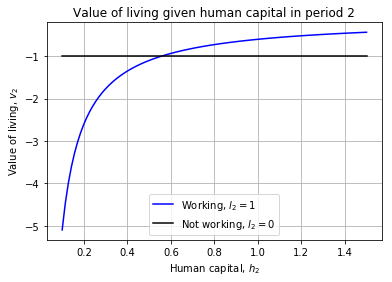

The break is found at h ≥ 0.567


In [11]:
# Plotting the value of living given skill accumulation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v2(h_vec,1,rho,gamma,w,b), color = "blue")
ax.plot(h_vec, v2_vec_unemp, color = "black")
ax.grid()
ax.set_xlabel('Human capital, $h_2$')
ax.set_ylabel('Value of living, $v_2$')
ax.set_title('Value of living given human capital in period 2')
plt.legend(('Working, $l_2=1$','Not working, $l_2=0$'),loc='lower center')
plt.show()
index = np.where(l2_vec == 1)[0][0];
print('The break is found at h ≥ ' + str(round(h_vec[index],3)))

From the graph we see that based on the parameter values the worker obtains negative utility regardless of working or not, however they receive less disutility when their skill level is above around 0.567. Next, we plot the labour supply as a function of human capital.

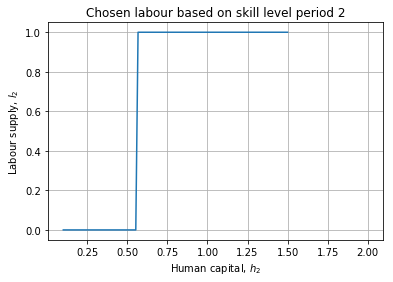

In [12]:
# Plotting labour supply as function of humn capital, period 2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l2_vec,rho,gamma,w,b)
ax.grid()
ax.set_xlabel('Human capital, $h_2$')
ax.set_ylabel('Labour supply, $l_2$')
ax.set_title('Chosen labour based on skill level period 2')
plt.show()

As shown in the graph if the worker accumulates human capital that exceeds around 0.55 then the worker will choose to work in period 2, as this provides the worker with a higher amount of utility (see the first figure). If the human capital is insufficient, the worker will choose not to work and instead reap the unemployment benefits as the disutiliy from working outweighs the utility of consumption based on wage rate and labour supply. 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

Similar to question one we first define the solution function,

In [14]:
# 1. Constructing the interpolator
v2_interp = interpolate.RegularGridInterpolator([h_vec],v2_vec,bounds_error=False,fill_value=None)

def solve_period_1(h_vec, v2_interp,rho,gamma,w,b):
    
    # a. Creating grids
    v1_vec =  np.empty(100)
    l1_vec = np.empty(100)
    v1_vec_unemp = np.empty(100)
    
    # b. loop for each element in capital vector
    for i,h1 in enumerate(h_vec): 
        
        # i. utility comparison, selecting labour value and writing to list
        if (v1(h1,1,v2_interp,rho,gamma,w,b) > v1(h1,0,v2_interp,rho,gamma,w,b)) == True: 
            l1_vec[i] = 1
        else: # utility when not working
            l1_vec[i] = 0
            
        # ii. feeding into list
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,rho,gamma,w,b)
        v1_vec_unemp[i] = utility(h1,0,rho,gamma,w,b)
    
    return v1_vec, l1_vec, v1_vec_unemp

# 2. Solving for utility and labour
v1_vec, l1_vec, v1_vec_unemp =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)

Next, we plot the labour supply as a function of human capital.

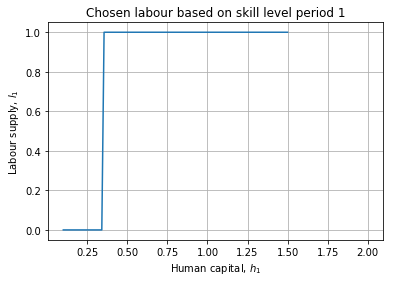

In [16]:
# Plotting labour supply as function of humn capital, period 1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l1_vec,rho,gamma,w,b)
ax.grid()
ax.set_xlabel('Human capital, $h_1$')
ax.set_ylabel('Labour supply, $l_1$')
ax.set_title('Chosen labour based on skill level period 1')
plt.show()

We see that the skill level required for to incentivize the worker to work has been lowered to approximately 0.35. Given that the worker has a chance of gaining experience and thus accumulating human capital (as demoninated by $\Delta$), the second period requires a higher amount of human capital in order for the worker to work. 

Next, we plot the utility as a function of human capital accumulation.

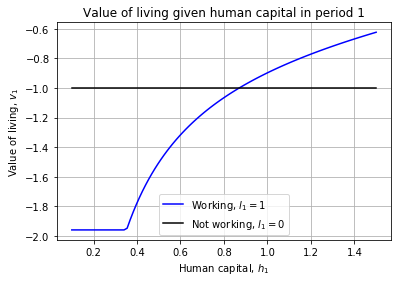

The break is found at h ≥ 0.355


In [17]:
# Plotting the value of living given skill accumulation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v1_vec, color = "blue")
ax.plot(h_vec,v1_vec_unemp, color = 'black')
ax.grid()
ax.set_xlabel('Human capital, $h_1$')
ax.set_ylabel('Value of living, $v_1$')
ax.set_title('Value of living given human capital in period 1')
plt.legend(('Working, $l_1=1$','Not working, $l_1=0$'),loc='lower center')
plt.show()
index = np.where(l1_vec == 1)[0][0];
print('The break is found at h ≥ ' + str(round(h_vec[index],3)))

From the graph we see that the point when the worker wants to work is when the human capital is at a level of $h = 0.355$ or above. 


**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

We illustrate the effects of changing the wage rate, $w$, aversion to work, $\gamma$ and the unemployment benefits, $b$, to the workers value of living in period 1 and period 2. 

In [18]:
# Defining function with the three main arguments
def int_fig(w,b,gamma):

    # 1. Unpacking solutions
    v1_vec, l1_vec, v1_vec_unemp =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)
    v2_vec,l2_vec, v2_vec_unemp =  solve_period_2(h_vec,rho,gamma,w,b)

    # 2. Creating figure
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2,  ncols=2, sharex=True, figsize=(14,10))
    
    # Setting up subfigures
    # Value of living period 1
    ax1.plot(h_vec,v1_vec_unemp, label='Utility if $l_1=0$', color = 'black')
    ax1.plot(h_vec,v1_vec, label='Utility if $l_1=1$', color = 'blue')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('Human capital, $h_1$')
    ax1.set_ylabel('Value of living, $v_1$')
    ax1.set_title('Value of living period 1');

    # Human capital / Labour supply period 1
    ax2.plot(h_vec,l1_vec, label='Labor supply')
    ax2.grid()
    ax2.set_xlabel('Human caital, $h_1$')
    ax2.set_ylabel('Labor supply, $l_1$')
    ax2.set_title('Labour supply as a function of human capital period 1');
    
    # Value of living period 2
    ax1.plot(h_vec,v2_vec_unemp, label='Utility if $l_2=0$', color = 'black')
    ax3.plot(h_vec,v2_vec, label='Utility if $l_2=1$', color = 'blue')
    ax3.grid()
    ax3.legend(loc='lower right')
    ax3.set_xlabel('Human capital, $h_2$')
    ax3.set_ylabel('Value of living, $v_2$')
    ax3.set_title('Value of living in period 2');

    # Human capital / Labour supply period 2
    ax4.plot(h_vec,l2_vec, label='Labor supply')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('Human capital, $h_2$')
    ax4.set_ylabel('Labor supply, $l_2$')
    ax4.set_title('Labour supply as a function of human capital period 2');

# 3. Interactive widgets for benefits, wages and work aversion
widgets.interact(int_fig,
    b = widgets.FloatSlider(
                    value=1,
                    description='Unemployment benefits', 
                    min=0.1,
                    max=5, 
                    step=0.1,
                    ),
    w = widgets.FloatSlider(
                    value=2,
                    description='Wage rate', 
                    min=0.1,
                    max=5, 
                    step=0.1,
                    ),
    gamma = widgets.FloatSlider(
                    value=0.1,
                    description='Aversion to work', 
                    min=0,
                    max=5, 
                    step=0.1,
                    )
); 

interactive(children=(FloatSlider(value=2.0, description='Wage rate', max=5.0, min=0.1), FloatSlider(value=1.0…

It is possible that the worker has no reason to work in either the first or the second period given that the benefits of not working are high enough. This is also in line with basic economic intuition. Conversely, it is possible that the worker decides to work even though the wages are lower than the benefits given a sufficiently low aversion to work and high enough level of human capital. 

Overall, there is no definitive answer as it depends on the relative relationship between wages, benefits and the disutility of working.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [4]:
import sympy as sm
sm.init_printing(use_unicode=True)
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True)


par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075
par['delta'] = 0.80
par['omega'] = 0.15
par['stoc_x'] = 3.492
par['stoc_c'] = 0.2

delta = par['delta']
omega = par['omega']

pi = sm.symbols("pi_t")
pi_minus1 = sm.symbols("pi_t-1")
alpha = sm.symbols("alpha")
gamma = sm.symbols("gamma")
phi = sm.symbols("phi")
h = sm.symbols("h")
b = sm.symbols("b")
v = sm.symbols("v_t")
y = sm.symbols("y_t")
y_minus1 = sm.symbols("y_t-1")
s= sm.symbols("s_t")
s_minus1 = sm.symbols("s_t-1")
x = sm.symbols("x")
c = sm.symbols("c")

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [ ]:
#Question 1:

# a. We define the AD-curve as given in the introduction
AD = 1/(h*alpha)*(v-(1+b*alpha)*y) 

# b. We define the SRAS-curve as given in the introduction
SRAS = pi_minus1 + gamma*y - phi*gamma*y_minus1 + s - phi*s_minus1

# c. We set AD and SRAS equal to eachother. 
AD_equal_SRAS = sm.Eq(SRAS,AD)

# d. We calulate the steady-state value of the output in the model: 
steady_state_y = sm.solve(AD_equal_SRAS,y)

print("The optimal choice", y, "is:", steady_state_y)

In [ ]:
# e. Since we now know the steady-state value for output, we can use this to find steady-state for inflation:
steady_state_pi = 1/(h*alpha)*(v-(1+b*alpha)*steady_state_y[0]) 

print("The optimal choice", pi, "is:", steady_state_pi)

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [ ]:
#Question 2:

#a. We define the numerical solutions for y and pi. 
y_numerical_solution = sm.lambdify((v,alpha,b,gamma,h,phi,y_minus1,pi_minus1,s,s_minus1),steady_state_y[0])
pi_numerical_solution = sm.lambdify((v,alpha,b,gamma,h,phi,y_minus1,pi_minus1,s,s_minus1), steady_state_pi)


def y_solution_scenario1(v,y_minus1,pi_minus1,s,s_minus1):
    return y_numerical_solution(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y_minus1,pi_minus1,s,s_minus1)

def pi_solution_scenario1(v,y_minus1,pi_minus1,s,s_minus1):
    return pi_numerical_solution(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y_minus1,pi_minus1,s,s_minus1)


print("The optimal solution for output (y) in the scenario where the parameter values are set to 0, is:", y_solution_scenario1(v=0,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))
print("The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, is:", pi_solution_scenario1(v=0,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))

In [ ]:
#In the case for v = 0.1:
print("The optimal solution for output (y) in the scenario where the parameter values are set to 0, except v = 0.1, is:", y_solution_scenario1(v=0.1,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))
print("The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, except v = 0.1, is:", pi_solution_scenario1(v=0.1,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))

For the sake of illusatration, we can show how this looks by defining the functions numerically: 

In [ ]:
def AD_numerical_function(v,y):
    return 1/(par['h']*par['alpha'])*(v-(1+par['b']*par['alpha'])*y)

def SRAS_numerical_function(pi_minus1,s,s_minus1,y): 
    return pi_minus1 + par['gamma']*y-par['phi']*par['gamma']*y_minus1+s-par['phi']*s_minus1

#We define parameter values
pi_minus1 = 0 
s = 0 
s_minus1 = 0 
v = 0 
v_shock = 0.1
y = np.linspace(-0.5,0.5,100)

#We then define the functions we wish to show graphically:
AD_num_func = AD_numerical_function(v,y)
AD_with_shock = AD_numerical_function(v_shock,y)
SRAS_num_func = SRAS_numerical_function(pi_minus1,s,s_minus1,y)

#We can now create the plot and show the relationship between the three functions:
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(111)
ax.plot(y, AD_num_func)
ax.plot(y, AD_with_shock)
ax.plot(y, SRAS_num_func)
ax.set_xlabel("output gap, $y_t$")
ax.set_ylabel("inflation gap, $pi_t$")
ax.set_title ("AS-AD model with positive demand shock")
ax.grid()
plt.legend(("AD-equilibrium","AD-demand shock","SRAS-equilibrium"))


**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. 

We start off by defining the autoregressive processes:

In [5]:
#Question 3:

#We define the autoregressive processes as functions:
def v_autoregressive(v_minus1,x):
    return par['delta']*v_minus1+x

def s_autoregressive(s_minus1,c):
    return par['omega']*s_minus1+c

# We then set the initial values:
T = 250
pi_vector = [0]
y_vector = [0]
s_vector = [0]
v_vector = [0]
c_vector = np.zeros(T)
x_vector = np.zeros(T)
x_vector[1] = 0.1

# We then start the simulation, and make sure that for each value in a period t, is appended to the vector list defined above:
for t in range(1,T):
    s_vector.append(s_autoregressive(s_vector[t-1],c_vector[t])) # We make sure the different autoregressive values are appeneded to the s_vector
    v_vector.append(v_autoregressive(v_vector[t-1],x_vector[t])) # We make sure the different autoregressive values are appeneded to the v_vector
    
    y_vector.append(y_solution_scenario1(v_vector[t],y_vector[t-1],pi_vector[t-1],s_vector[t],s_vector[t-1])) # We appened to output
    pi_vector.append(pi_solution_scenario1(v_vector[t],y_vector[t-1],pi_vector[t-1],s_vector[t],s_vector[t-1])) #We appened to inflation
    

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [5]:
#We then build the plot:
timeline = np.linspace(1,T,T)

figure_time = plt.figure()
plt.axes()
ax = figure_time.add_subplot(111)
ax.plot(timeline, y_vector)
ax.plot(timeline, pi_vector)
ax.set_xlabel("time")
ax.set_ylabel("inflation- and output gap")
ax.set_title("How the economy evolves after shock, $v_t=0.1$, happens")
ax.grid()
plt.legend("Inflation", "Output")

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

Due to an issue with having defined many of the lagged variables as "sm.symbols(x_t-1)", we redefine the symbols as well as many of the functions from before:


**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [6]:
pi = sm.symbols("pi")
gamma = par["gamma"]
phi = sm.symbols("phi")
y = sm.symbols("y")
y_lag = sm.symbols("y_lag")
pi_lag = sm.symbols("pi_lag")
s = sm.symbols("s")
s_lag = sm.symbols("s_lag")
alpha = par["alpha"]
h = par["h"]
b = par["b"]
v = sm.symbols("v")

We also redefine the AR and SRAS curves:

In [ ]:
AD = (1/(h*alpha))*(v-(1+(b*alpha))*y)
SRAS = pi_lag+gamma*y-phi*gamma*y_lag+s-phi*s_lag

In [ ]:
#We now solve the equations as we did previously:
AD_equal_SRAS = sm.Eq(AD,SRAS)
y_final = sm.solve(AD_equal_SRAS,y)[0]
print("Output gap is period t is:", y_final)

In [ ]:
pi_solve= sm.Eq(pi,SRAS)
pi_final = sm.solve(pi_solve, pi)[0]
print("Inflation gap in period t is:", pi_final)

In [ ]:
y_lambdified = sm.lambdify((pi_lag, s, v, phi, s_lag, y_lag), y_final)
pi_lambdified = sm.lambdify((pi_lag, s, y, phi, s_lag, y_lag), pi_final)

In [ ]:
def simulate(stoc_x, stoc_c, phi):
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, stoc_x) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, stoc_c) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    # Get full list of v and s for all 1000 periods.
    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0] #initialisation of output gap
    inflation = [0] #initialisation of inflation gap

    # Get full list of output and inflation for all 1000 periods.
    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_lambdified(pi_lag = inflation[k], s = j,
                                    y = y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]),
                                    phi = phi, s_lag = s[k], y_lag = output[k]))
     
    # Define autocorrelation function
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    # Calculate the relevant statistics
    var_output = np.var(output)
    var_inflation = np.var(inflation)
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    acf_output = autocorr(output)[1][0]
    acf_inflation = autocorr(inflation)[1][0]
    
    # Return the output, inflation and the calculated statistics
    return output, inflation, var_output, var_inflation, corr_output_inflation, acf_output, acf_inflation

In [ ]:
output = simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[0]
inflation = simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[1]

# Create a list with periods. This is used as the x-axis
t = range(0, 1000, 1)

In [ ]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(t, output, label = 'Output gap', alpha=0.7)
ax.plot(t, inflation, linestyle= ':', label = 'Inflation gap', color='red')
#ax.grid() 
ax.legend()
ax.set_xlabel('t') # 
ax.set_ylabel('$y_t, \pi_t$')
ax.set_title('Output and inflation gap for 1000 periods with $\phi=0.1$')
plt.xticks(range(0, 1001, 100))
plt.show()

In [ ]:
print("Output variance:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[2], 4)))
print("Inflation variance:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[3], 4)))
print("Correlation between output and inflation:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[4],4)))
print("Output auto-correlation: " + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[5], 4)))
print("Inflation auto-correlation: "+ str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[6], 4)))

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [ ]:
# Getting the correlation output
corr_output_inflation = [] #List for the output over correlation
phi_range = np.linspace(0,1,21)

for i in phi_range:
    corr_output_inflation.append(simulate(stoc_x = 3.492, stoc_c = 0.2, phi = i)[4])
    
    

In [ ]:
# plot the results
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(phi_range, corr_output_inflation, label = "$corr(y_t,\pi_t)$", alpha=1.0)
#ax.grid() 
ax.legend()
ax.set_xlabel("$\phi$")  
ax.set_ylabel("$corr(y_t,\pi_t)$")
ax.set_title("$corr(y_t,\pi_t)$ as a function of $\phi$")
#plt.xticks(range(0, , 10))
plt.axhline(y=0.31, color = 'black', linewidth = 1, linestyle =':', label = "$corr(y_t,\pi_t)=0.31$")
plt.legend()
plt.show()

In [ ]:
def simulate_corr(phi, stoc_x=3.492, stoc_c=0.2, target = 0.31):
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, stoc_x) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, stoc_c) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0]
    inflation = [0]

    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_lambdified(pi_lag = inflation[k], s = j,
                                    y =y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]),
                                    phi = phi, s_lag = s[k], y_lag = output[k]))
    # Define autocorrelation   
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    diff_corr_target = (corr_output_inflation - target)**2 #squared difference

    
    return diff_corr_target

In [ ]:
x = lambda phi: simulate_corr(phi) #objective function
phi_opt = optimize.minimize_scalar(x, method='bounded', bounds=[0,1]) #bounded scalar minimizer

In [ ]:
print('If phi is ' + str(phi_opt.x) + ' then:')
print('Correlation between output and inflation: '+ str(simulate(stoc_x=3.492, stoc_c=0.2, phi = phi_opt.x)[4]))

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

In [ ]:
def simulate_full(vector):
    #Takes in a vector with: (phi, stoc_x, stoc_c)
    
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, vector[1]) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, vector[2]) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0]
    inflation = [0]

    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = vector[0], s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_lambdified(pi_lag = inflation[k], s = j,
                                    y =y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = vector[0], s_lag = s[k], y_lag = output[k]),
                                    phi = vector[0], s_lag = s[k], y_lag = output[k]))
    # Define autocorrelation    
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    #Summary stats
    var_output = np.var(output)
    var_inflation = np.var(inflation)
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    acf_output = autocorr(output)[1][0]
    acf_inflation = autocorr(inflation)[1][0]
    
    #Targets
    targets = [1.64, 0.21, 0.31, 0.84, 0.48]
    
    #Squared differences
    diff_output = (var_output - targets[0])**2
    diff_inflation = (var_inflation - targets[1])**2
    diff_corr_target = (corr_output_inflation - targets[2])**2 #squared difference
    diff_acf_output = (acf_output - targets[3])**2
    diff_acf_inflation = (acf_inflation - targets[4])**2
    
    #Sum of squared differences
    diff_sumsq = sum([diff_output, diff_inflation, diff_corr_target, diff_acf_output, diff_acf_inflation])
    
    return diff_sumsq

In [ ]:
x = lambda test: simulate_full(test) #objective function
guess = (0.92, 3.492, 0.2) # initial guess
targets = [1.64, 0.21, 0.31, 0.84, 0.48] # for printing

# define bounds
phi_bounds = (0,1) 
stoc_x_bounds = (0,100) #100 aribitrarily chosen
stoc_c_bounds = (0,100) #100 arbitrarily chosen
bounds = (phi_bounds, stoc_x_bounds, stoc_c_bounds)

In [ ]:
vector_opt = optimize.minimize(x, x0 = guess, method="Nelder-Mead", bounds=bounds, options={'maxiter': 30000}) #bounded minimizer
vector_opt.x

After using different methods to solve to minimization problem, we got the same result for several different methods, which were:

- $\phi=0.978$
- $\sigma_x=3.308$
- $\sigma_c=0.466$

Using these results we get the following outputs for variance, correlation and auto-correlation:

In [ ]:
print('Variance of output: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[2]) +
      ' with a target of: ' + str(targets[0]))
print('Variance of inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[3]) +
      ' with a target of: ' + str(targets[1]))
print('Correlation between output and inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[4]) + 
      ' with a target of: ' + str(targets[2]))
print('Auto-correlation output: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[5]) + 
      ' with a target of: ' + str(targets[3]))
print('Auto-correlation inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[6]) + 
      ' with a target of: ' + str(targets[4]))

We can then compare our results to those we wished to emulate, and we see that we get exactly the same results.

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [185]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

In [186]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sm
import math
from mpl_toolkits.mplot3d import Axes3D
import itertools
import matplotlib as mpl

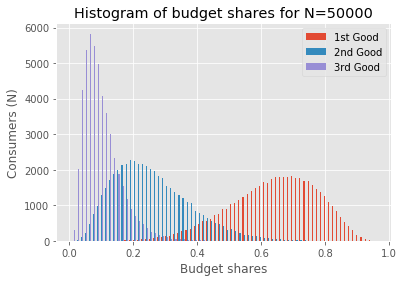

In [187]:
# We plot the histogram
plt.hist(betas, bins=75, label = ['1st Good', '2nd Good', '3rd Good'])
plt.ylabel('Consumers (N)')
plt.xlabel('Budget shares')
plt.title('Histogram of budget shares for N=50000')
plt.legend()
plt.show()

**Question 2:** Plot the excess demand functions.

In [188]:
# We define the 3 demand functions

# Good 1
def demand_good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

# Good 2
def demand_good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

# Good 3
def demand_good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

In [189]:
# Defining the excess demand functions

# Excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(demand_good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# Excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(demand_good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# Excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e1)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3


In [190]:
# Defining the limits
size = 75

linspace_p1 = np.linspace(1, 10, size)
linspace_p2 = np.linspace(1, 10, size)

grid1_empty = np.empty((size,size))
grid2_empty = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(linspace_p1, linspace_p2) 
for i,p1 in enumerate(linspace_p1):
    for j,p2 in enumerate(linspace_p2):
        grid1_empty[i,j] = excess1_func(betas, p1 , p2, e1, e2, e3)
        grid2_empty[i,j] = excess2_func(betas, p1 , p2, e1, e2, e3)

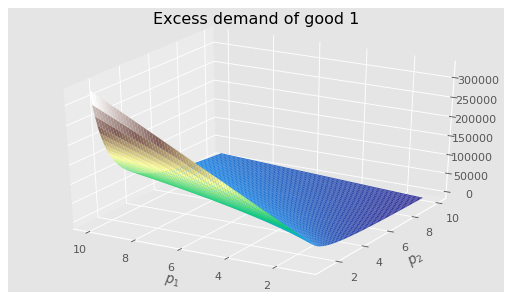

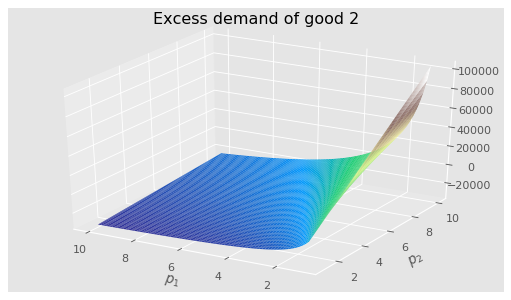

In [191]:
# Plotting the figures

# Figure for good 1
fig1 = plt.figure(dpi=80, figsize=(8,16))

axis1 = fig1.add_subplot(3,1,1, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, grid1_empty, cmap=plt.cm.terrain, cstride=1, rstride=1)

# Defining title and labels
axis1.set_title('Excess demand of good 1')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')
axis1.invert_xaxis()

#Figure for good 2
fig2 = plt.figure(dpi=80, figsize=(8,16))

axis2 = fig2.add_subplot(3,1,1, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, grid2_empty, cmap=plt.cm.terrain, cstride=1, rstride=1)

# Defining title and labels
axis2.set_title('Excess demand of good 2')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')
axis2.invert_xaxis()

We see, as expected, that the excess demand of good 1 is highly dependant on the price of good 1, and likewise with good 2.

**Question 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

As described, we will find the equilibrium by a trial-and-error method (tâtonnement).

In [261]:
# We set some parameter values
epsilon = 1e-8
kappa = 0.1
p1 = 3
p2 = 3

# Setting starting point and cap for iterations
t=0
cap = 25000

# Defining the iteration
while t < cap:
    Z1 = excess1_func(betas, p1, p2, e1, e2, e3)
    Z2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    if Z1 < epsilon and Z2 < epsilon:
        print()
        break
    else:
        p1 += kappa*Z1/N
        p2 += kappa*Z2/N
        
    # Setting up the print
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 25000:
        print(f'Iteration {t} -> Excess good 1: {Z1:10.4f} - Excess good 2: {Z2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 0 -> Excess good 1: 24830.6208 - Excess good 2: -19681.1061 -> p1:     3.0497 - p2:     2.9606
Iteration 5 -> Excess good 1: 19962.4377 - Excess good 2: -17490.0649 -> p1:     3.2675 - p2:     2.7770
Iteration 10 -> Excess good 1: 16362.3056 - Excess good 2: -15373.7747 -> p1:     3.4447 - p2:     2.6149
Iteration 15 -> Excess good 1: 13599.7239 - Excess good 2: -13339.5522 -> p1:     3.5912 - p2:     2.4734
Iteration 20 -> Excess good 1: 11432.3113 - Excess good 2: -11406.8960 -> p1:     3.7138 - p2:     2.3517
Iteration 25 -> Excess good 1:  9709.4558 - Excess good 2: -9600.2502 -> p1:     3.8175 - p2:     2.2486
Iteration 30 -> Excess good 1:  8329.8788 - Excess good 2: -7943.2771 -> p1:     3.9060 - p2:     2.1627
Iteration 35 -> Excess good 1:  7220.9377 - Excess good 2: -6454.4097 -> p1:     3.9825 - p2:     2.0923
Iteration 40 -> Excess good 1:  6327.8340 - Excess good 2: -5144.0469 -> p1:     4.0492 - p2:     2.0358
Iteration 45 -> Excess good 1:  5607.7219 - Excess g

We see, that after around 12,500 iterations, the equilibrium prices has been found by trial and error.

The equilibrium prices are:

$(p1, p2, p3) = (6.49, 2.62, 1.00)$

These are having an excess demand of (Z1, Z2) = (0, 0)

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

In [193]:
# We define the utility function
def u_j(betas, gamma, p1, p2, e1, e2, e3):
    
    # Quantities of each good
    Q1 = demand_good1_func(betas, p1, p2, e1, e2, e3)
    Q2 = demand_good2_func(betas, p1, p2, e1, e2, e3)
    Q3 = demand_good3_func(betas, p1, p2, e1, e2, e3)
    
    # Defining the betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculate the consumers utilities
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma

# We use the prices found in Question 3.3 and define u_j*
p1 = 6.4901
p2 = 2.6167
u_j_star = u_j(betas, gamma, p1, p2, e1, e2, e3)

Mean:     1.0101644016258116
Variance: 0.317340867953136


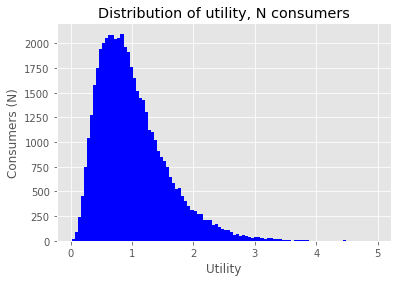

In [194]:
# Plot the histogram of the utility distribution
plt.style.use('ggplot')
plt.hist(u_j_star, bins = 100, color = 'b')
plt.title('Distribution of utility, N consumers')
plt.xlabel('Utility')
plt.ylabel('Consumers (N)')

# Print the mean and variance of the distribution
print("Mean:    " ,np.mean(u_j_star))
print("Variance:" ,np.var(u_j_star))

We see the utility distribution having a mean on 1.0, and a variance of 0.32.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

In [195]:
# We draw a new random e
np.random.seed(seed)
e = np.random.exponential(zeta,size=N)

In [196]:
# Defining the 3 equal endowments
h1 = e
h2 = e
h3 = e

In [197]:
# We define the 3 demand functions as in previous questions

# Good 1
def demand_good1_func(betas, p1, p2, h1, h2, h3):
    I = p1*h1 + p2*h2 + h3
    return betas[:,0]*I/p1

# Good 2
def demand_good2_func(betas, p1, p2, h1, h2, h3):
    I = p1*h1 + p2*h2 + h3
    return betas[:,1]*I/p2

# Good 3
def demand_good3_func(betas, p1, p2, h1, h2, h3):
    I = p1*h1 + p2*h2 + h3
    return betas[:,2]*I

In [198]:
# Defining the excess demand functions

# Excess demand function 1
def excess1_func(betas, p1, p2, h1, h2, h3):
    
    # demand
    demand_1 = np.sum(demand_good1_func(betas, p1, p2, h1, h2, h3))
    
    # supply
    supply_1 = np.sum(h1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# Excess demand function 2
def excess2_func(betas, p1, p2, h1, h2, h3):
    
    # demand
    demand_2 = np.sum(demand_good2_func(betas, p1, p2, h1, h2, h3))
    
    # supply
    supply_2 = np.sum(h2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# Excess demand function 3
def excess3_func(betas, p1, p2, h1, h2, h3):
    
    # demand
    demand_3 = np.sum(demand_good3_func(betas, p1, p2, h1, h2, h3))
    
    # supply
    supply_3 = np.sum(h1)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3


In [199]:
# We set some parameter values
epsilon = 1e-8
kappa = 0.1
p1 = 3
p2 = 3

# Setting starting point and cap for iterations
t=0
cap = 25000

# Defining the iteration
while t < cap:
    Z1 = excess1_func(betas, p1, p2, h1, h2, h3)
    Z2 = excess2_func(betas, p1, p2, h1, h2, h3)
    
    if Z1 < epsilon and Z2 < epsilon:
        print()
        break
    else:
        p1 += kappa*Z1/N
        p2 += kappa*Z2/N
        
    # Setting up the print
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 25000:
        print(f'Iteration {t} -> Excess good 1: {Z1:10.4f} - Excess good 2: {Z2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 0 -> Excess good 1: 24941.4133 - Excess good 2: -19893.1186 -> p1:     3.0499 - p2:     2.9602
Iteration 5 -> Excess good 1: 20016.8014 - Excess good 2: -17676.0385 -> p1:     3.2685 - p2:     2.7746
Iteration 10 -> Excess good 1: 16379.2913 - Excess good 2: -15533.0638 -> p1:     3.4460 - p2:     2.6108
Iteration 15 -> Excess good 1: 13590.7125 - Excess good 2: -13471.8583 -> p1:     3.5925 - p2:     2.4679
Iteration 20 -> Excess good 1: 11404.9469 - Excess good 2: -11512.7026 -> p1:     3.7149 - p2:     2.3450
Iteration 25 -> Excess good 1:  9669.2817 - Excess good 2: -9681.0386 -> p1:     3.8182 - p2:     2.2410
Iteration 30 -> Excess good 1:  8281.0904 - Excess good 2: -8001.5218 -> p1:     3.9063 - p2:     2.1544
Iteration 35 -> Excess good 1:  7166.7577 - Excess good 2: -6493.3718 -> p1:     3.9822 - p2:     2.0836
Iteration 40 -> Excess good 1:  6270.7207 - Excess good 2: -5167.4323 -> p1:     4.0484 - p2:     2.0268
Iteration 45 -> Excess good 1:  5549.5073 - Excess g

We see now, that the equilibrium prices are a bit different now, where the endowments are equal as opposed to before, where the endowments were different.

The new equilibrium prices are:

$(p1, p2, p3) = (6.44, 2.59, 1.00)$

Which is slightly lower than the prices found earlier, where the endowments were different.

We new want to plot the two utility functions against eachother to compare.

In [258]:
# Define the utility function as previously
def u_j2(betas, gamma, p1, p2, h1, h2, h3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    Q1 = demand_good1_func(betas, p1, p2, h1, h2, h3)
    Q2 = demand_good2_func(betas, p1, p2, h1, h2, h3)
    Q3 = demand_good3_func(betas, p1, p2, h1, h2, h3)
    
    # Betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma
    

In [259]:
# Define the new u with the new values for the prices
p1 = 6.4436
p2 = 2.5921
u_j_new = u_j2(betas, gamma, p1, p2, h1, h2, h3)

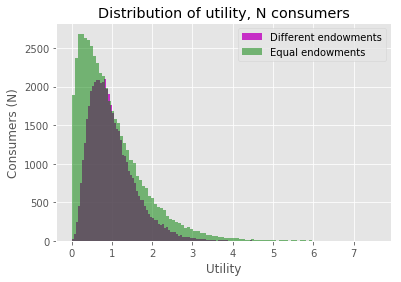

Mean different endowments:     1.0101644016258116
Variance different endowments: 0.317340867953136
Mean equal endowments:         0.9765362713740917
Variance equal endowments:     0.6330577903556954


In [260]:
# We plot the new values in a histogram
plt.hist(u_j_star, bins = 100, alpha = 0.8, label = 'Different endowments', color = 'm')
plt.hist(u_j_new, bins = 100, alpha = 0.5, label = 'Equal endowments', color = 'g')
plt.style.use('ggplot')
plt.title('Distribution of utility, N consumers')
plt.xlabel('Utility')
plt.ylabel('Consumers (N)')
plt.legend()
plt.show()
print("Mean different endowments:    " ,np.mean(u_j_star))
print("Variance different endowments:" ,np.var(u_j_star))
print("Mean equal endowments:        " ,np.mean(u_j_new))
print("Variance equal endowments:    " ,np.var(u_j_new))

We see a slightly lower mean for the equal endowments, as well as a higher variance.
The variance can clearly be seen visually to be higher for the equal endowments shown as the green histogram.

This is due to the fact, that by having equal endowments, the incitament for exchanging is lesser, since every endowment is exactly the same. Thereby the mean is approximately the same, yet the variance is higher, which also is the case in the histogram.

In [256]:
# We now set a new gamma to see if the conclusion change
gamma = 0.05

In [250]:
# Define the function where endowments are different with new gamma
def u_j(betas, gamma, p1, p2, e1, e2, e3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    Q1 = demand_good1_func(betas, p1, p2, e1, e2, e3)
    Q2 = demand_good2_func(betas, p1, p2, e1, e2, e3)
    Q3 = demand_good3_func(betas, p1, p2, e1, e2, e3)
    
    # Betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma

p1 = 6.4901
p2 = 2.6167
u_j_star_gamma = u_j(betas, gamma, p1, p2, e1, e2, e3)   

In [251]:
# Define the function where endowments are equal with new gamma
def u_j2(betas, gamma, p1, p2, h1, h2, h3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    Q1 = demand_good1_func(betas, p1, p2, h1, h2, h3)
    Q2 = demand_good2_func(betas, p1, p2, h1, h2, h3)
    Q3 = demand_good3_func(betas, p1, p2, h1, h2, h3)
    
    # Betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma    

p1 = 6.4436
p2 = 2.5921
u_j_new_gamma = u_j2(betas, gamma, p1, p2, h1, h2, h3)

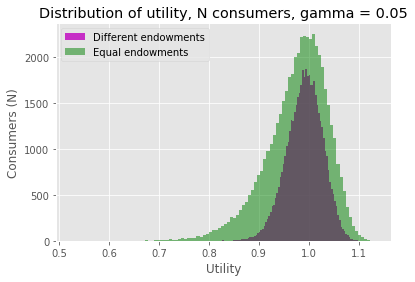

Mean different endowments:     0.9915627924172458
Variance different endowments: 0.001276360195555543
Mean equal endowments:         0.9762090414704895
Variance equal endowments:     0.0036798247996422287


In [252]:
# We plot the new values in a histogram
plt.hist(u_j_star_gamma, bins = 100, alpha = 0.8, label = 'Different endowments', color = 'm')
plt.hist(u_j_new_gamma, bins = 100, alpha = 0.5, label = 'Equal endowments', color = 'g')
plt.style.use('ggplot')
plt.title(r'Distribution of utility, N consumers, gamma = 0.05')
plt.xlabel('Utility')
plt.ylabel('Consumers (N)')
plt.legend()
plt.show()
print("Mean different endowments:    " ,np.mean(u_j_star_gamma)),
print("Variance different endowments:" ,np.var(u_j_star_gamma))
print("Mean equal endowments:        " ,np.mean(u_j_new_gamma)), 
print("Variance equal endowments:    " ,np.var(u_j_new_gamma))

As seen above, the conclusion does not change as gamma decreases to 0.05, the relative relationship between the two utility distributions are still the same.
